<a href="https://colab.research.google.com/github/gabrielrflopes/estudos/blob/main/SpaceX_Falcon9_Launches_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/estudos/main/SpaceX_Launches_Data.csv'

df_spx = pd.read_csv(data_path, delimiter = ',')

df_spx.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [ ]:
df_spx.tail()

,Date,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
85,2020-09-03,86,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1060,-80.603956,28.608058
86,2020-10-06,87,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1058,-80.603956,28.608058
87,2020-10-18,88,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,10,B1051,-80.603956,28.608058
88,2020-10-24,89,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,9,B1060,-80.577366,28.561857
89,2020-11-05,90,Falcon 9,3681.0,MEO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1062,-80.577366,28.561857


The dimensions of the dataset:

In [ ]:
print('This dataset contains',
      '\nRows:', df_spx.shape[0],
      '\nVariables:', df_spx.shape[1])

This dataset contains 
Rows: 90 
Variables: 17


Let's explore the variables names using the columns method.

In [ ]:
df_spx.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

THe types of the variables:

In [ ]:
df_spx.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Notice that `Date` is an object variable. We have to convert it to datetime,

In [ ]:
df_spx['Date'] = pd.to_datetime(df_spx['Date'])

print(df_spx['Date'].dtypes)

datetime64[ns]


Now, let's explore for missing values

In [ ]:
(df_spx.isna().sum() / df_spx.shape[0] * 100).sort_values(ascending = False).round(1)

LandingPad        28.9
FlightNumber       0.0
Reused             0.0
Longitude          0.0
Serial             0.0
ReusedCount        0.0
Block              0.0
Legs               0.0
GridFins           0.0
Date               0.0
Flights            0.0
Outcome            0.0
LaunchSite         0.0
Orbit              0.0
PayloadMass        0.0
BoosterVersion     0.0
Latitude           0.0
dtype: float64

As we can see, only the `LandingPad` variable has missing values. Let's look closer to this variable

In [ ]:
df_spx['LandingPad'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LandingPad, dtype: object

In [ ]:
df_spx['LandingPad'].sample(20)

17    5e9e3033383ecbb9e534e7cc
12                         NaN
58    5e9e3033383ecbb9e534e7cc
2                          NaN
1                          NaN
25    5e9e3033383ecbb9e534e7cc
46                         NaN
44                         NaN
64    5e9e3032383ecb6bb234e7ca
0                          NaN
48    5e9e3032383ecb6bb234e7ca
84    5e9e3032383ecb267a34e7c7
3                          NaN
82    5e9e3033383ecbb9e534e7cc
32    5e9e3032383ecb6bb234e7ca
18    5e9e3032383ecb6bb234e7ca
14                         NaN
30                         NaN
24    5e9e3032383ecb6bb234e7ca
67                         NaN
Name: LandingPad, dtype: object

`LandingPad` refers to the landing facilities used to recover components of SpaceX's VTVL reusable launch vehicles. Not all of the launches utilizes the launchpad, so it's understandable that some of the data is labeled as NaN in this case.

Let's look now at some statistical descriptions from the dataset.

In [ ]:
df_spx.describe().round(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.00,90.00,90.00,90.0,90.00,90.00,90.00
mean,45.50,6123.55,1.79,3.5,2.79,-86.37,29.45
std,26.12,4732.12,1.21,1.6,3.44,14.15,2.14
min,1.00,350.00,1.00,1.0,0.00,-120.61,28.56
25%,23.25,2510.75,1.00,2.0,0.00,-80.60,28.56
50%,45.50,4701.50,1.00,4.0,1.00,-80.58,28.56
75%,67.75,8912.75,2.00,5.0,4.00,-80.58,28.61
max,90.00,15600.00,6.00,5.0,10.00,-80.58,34.63


In [ ]:
df_spx[['BoosterVersion', 'Orbit', 'LaunchSite']].describe()

,BoosterVersion,Orbit,LaunchSite
count,90,90,90
unique,1,11,3
top,Falcon 9,GTO,CCSFS SLC 40
freq,90,27,55


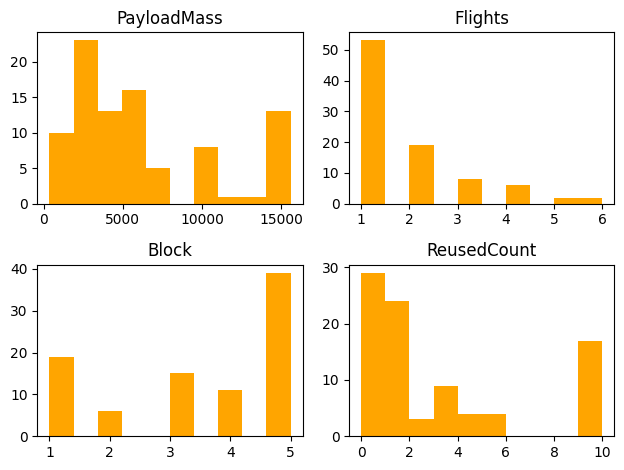

In [ ]:
fig, ax = plt.subplots(2, 2)

df_spx[['PayloadMass', 'Flights', 'Block', 'ReusedCount']].hist(ax = ax, grid = False, color = 'orange')

fig.tight_layout()
fig.show()

Correlation matrix

In [ ]:
corr = df_spx[['PayloadMass', 'Flights', 'ReusedCount', 'Block']].corr()

Text(0.5, 1.0, 'Correlation Matrix')

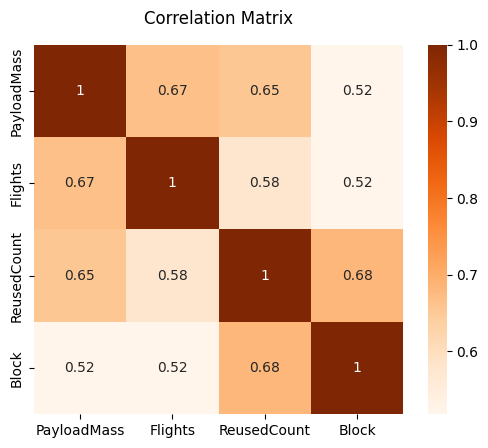

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(data = corr, square = True, annot = True, cmap = 'Oranges', cbar = True, ax = ax)

ax.set_title('Correlation Matrix', pad = 15)

<Axes: >

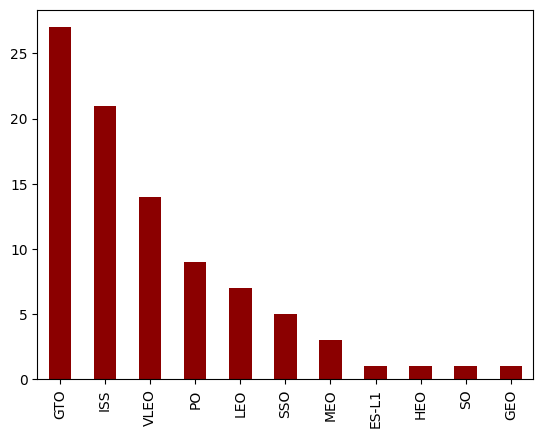

In [430]:
df_spx['Orbit'].value_counts().plot(kind = 'bar', color = 'darkred')

In [ ]:
df_spx.plot( )

<Axes: >

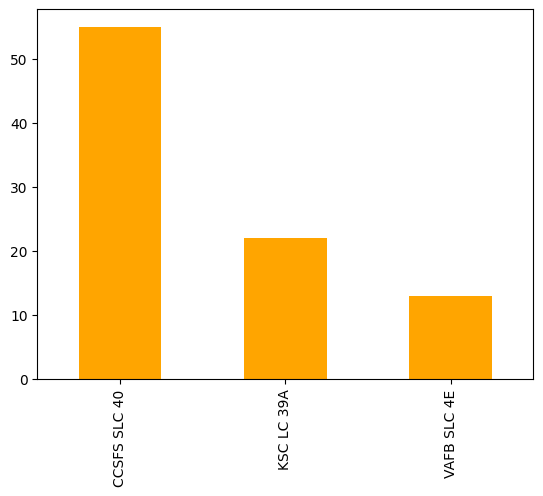

In [ ]:
df_spx['LaunchSite'].value_counts().plot(kind = 'bar', color = 'orange')

In [ ]:
df_spx['PayloadMass'] = df_spx['PayloadMass'].astype('int64')

In [ ]:
bins = np.linspace(df_spx['PayloadMass'].min(), df_spx['PayloadMass'].max(), 4)

print(bins)

group_names = ['350 Kg - 5400 Kg', '5400 Kg - 10500 Kg', '10500 Kg - 15600 Kg']

[  350.          5433.33333333 10516.66666667 15600.        ]


In [ ]:
df_spx['PayloadMassGroups'] = pd.cut(df_spx['PayloadMass'], bins, labels = group_names, include_lowest = True) 

df_spx[['PayloadMass', 'PayloadMassGroups']].head()

,PayloadMass,PayloadMassGroups
0,6123,5400 kg - 10500 kg
1,525,350 kg - 5400 kg
2,677,350 kg - 5400 kg
3,500,350 kg - 5400 kg
4,3170,350 kg - 5400 kg


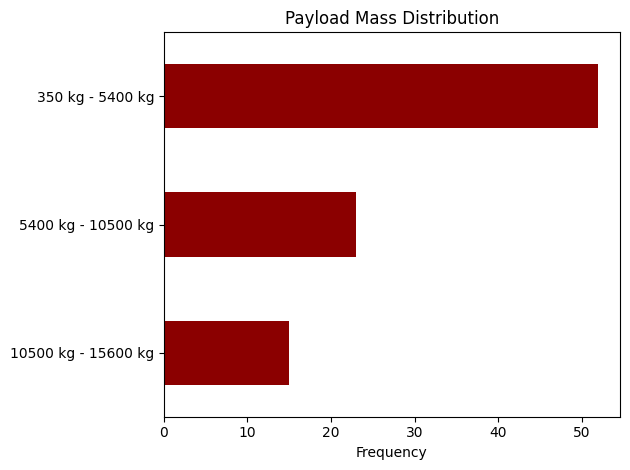

In [ ]:
fig, ax = plt.subplots()

df_spx['PayloadMassGroups'].value_counts()[:-4:-1].plot(kind = 'barh', grid = False, ax = ax, color = 'darkred')

ax.set_title('Payload Mass Distribution')
ax.set_xlabel('Frequency')

fig.tight_layout()
fig.show()

In [ ]:
x = ['ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO']

In [ ]:
y1 = df_spx.loc[df_spx['PayloadMassGroups'] == '350 kg - 5400 kg']['Orbit'].value_counts(dropna = False)

dict1 = {'VLEO': 0, 'SO': 0, 'GEO': 0}
s1 = pd.Series(data = dict1, index = dict1.keys())

y1 = pd.concat([y1, s1], axis = 0).sort_index()

In [ ]:
y2 = df_spx.loc[df_spx['PayloadMassGroups'] == '5400 kg - 10500 kg']['Orbit'].value_counts()

dict2 = {'ES-L1': 0, 'SSO': 0, 'HEO': 0, 'MEO': 0, 'VLEO': 0}
s2 = pd.Series(data = dict2, index = dict2.keys())

y2 = pd.concat([y2, s2], axis = 0).sort_index()

In [ ]:
y3 = df_spx.loc[df_spx['PayloadMassGroups'] == '10500 kg - 15600 kg']['Orbit'].value_counts()

dict3 = {'LEO': 0, 'PO': 0, 'GTO': 0, 'ES-L1': 0, 'SSO': 0, 'HEO': 0, 'MEO': 0, 'SO': 0, 'GEO': 0}
s3 = pd.Series(data = dict3, index = dict3.keys())

y3 = pd.concat([y3, s3], axis = 0).sort_index()

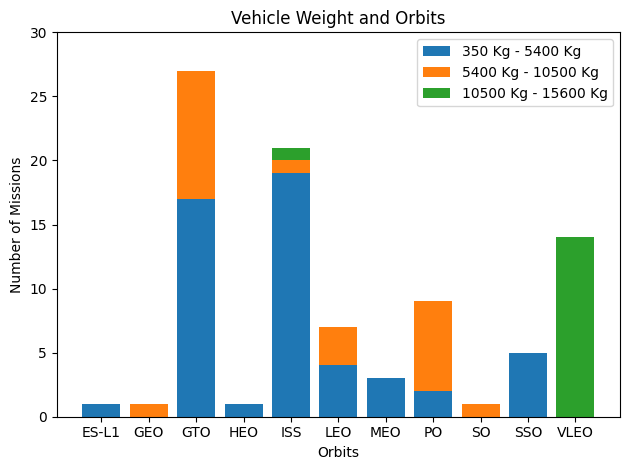

In [431]:
fig, ax = plt.subplots()

ax.bar(x, y1, label = '350 Kg - 5400 Kg')
ax.bar(x, y2, bottom = y1, label = '5400 Kg - 10500 Kg')
ax.bar(x, y3, bottom = y1 + y2, label = '10500 Kg - 15600 Kg')

ax.set_title('Vehicle Weight and Orbits')
ax.set_xlabel('Orbits')
ax.set_ylabel('Number of Missions')
ax.set_ylim(0, 30)
ax.legend(loc = 'upper right')

fig.tight_layout()
fig.show()

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'VAFB SLC 4E'][['Latitude', 'Longitude']].iloc[0]

Latitude      34.632093
Longitude   -120.610829
Name: 3, dtype: float64

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'KSC LC 39A'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.608058
Longitude   -80.603956
Name: 26, dtype: float64

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'CCSFS SLC 40'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.561857
Longitude   -80.577366
Name: 0, dtype: float64

In [ ]:
import folium 

usa = folium.Map(location = [28.5554521, -80.6090207], zoom_start = 10)

In [ ]:
folium.Marker(location = [34.632093,  -120.610829]).add_to(usa)
folium.Marker(location = [28.608058, -80.603956]).add_to(usa)
folium.Marker(location = [28.561857, -80.577366]).add_to(usa)

usa